# Project: cleanning - [candy data]


## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">wrangling</a></li>
  
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

> i will go through candy data 2017 , this data has :
- Internal_ID
- Q1-Going Out?: Are you actually going trick or treating yourself? "has values `Yes or No`"
- Q2-Gender: It has four different options, `Femal ,Male ,Other ,I'd rather not say`
- Q3-Age: Numerical field
- Q4-Country: Text Field, but users have written their own version of the names. Example, for America, there are entries such as USA, us, US, America so we should consider that while cleanning
- Q5-State/Province: Text Field, but users have written their own version of the names. Same as the country data.
- Q6-Joy Or Despair: All kinds of chocolate bars are the questions with three distinct options to choose from (Joy, Meh, Despair).
- Q7-Joy Other: Text Field to write items not included above that give you JOY. Lots of missing values.
- Q8-Despair Other: Text Field ti write items not included above that give you DESPAIR. Lots of missing values.
- Q9-Other Comments: Text Field. Lots of missing values.
- Q10-Dress: Binary field. Missing values present
- Unnamed: 113
- Q11-Day: Binary Answer Field. Missing values present


# 1- import packages and load data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns',None)

In [2]:
df=pd.read_excel("candyhierarchy2017.xlsx")

/usr/local/lib/python3.8/dist-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


<a id='wrangling'></a>
## Data Wrangling



### General Properties

# 2- show some general properties for the data 

In [3]:
df.shape

(2460, 120)

In [4]:
df.head()

,Internal ID,Q1: GOING OUT?,Q2: GENDER,Q3: AGE,Q4: COUNTRY,"Q5: STATE, PROVINCE, COUNTY, ETC",Q6 | 100 Grand Bar,Q6 | Anonymous brown globs that come in black and orange wrappers\t(a.k.a. Mary Janes),Q6 | Any full-sized candy bar,Q6 | Black Jacks,Q6 | Bonkers (the candy),Q6 | Bonkers (the board game),Q6 | Bottle Caps,Q6 | Box'o'Raisins,Q6 | Broken glow stick,Q6 | Butterfinger,Q6 | Cadbury Creme Eggs,Q6 | Candy Corn,Q6 | Candy that is clearly just the stuff given out for free at restaurants,Q6 | Caramellos,"Q6 | Cash, or other forms of legal tender",Q6 | Chardonnay,Q6 | Chick-o-Sticks (we don’t know what that is),Q6 | Chiclets,Q6 | Coffee Crisp,Q6 | Creepy Religious comics/Chick Tracts,Q6 | Dental paraphenalia,Q6 | Dots,Q6 | Dove Bars,Q6 | Fuzzy Peaches,Q6 | Generic Brand Acetaminophen,Q6 | Glow sticks,Q6 | Goo Goo Clusters,Q6 | Good N' Plenty,Q6 | Gum from baseball cards,Q6 | Gummy Bears straight up,Q6 | Hard Candy,Q6 | Healthy Fruit,Q6 | Heath Bar,Q6 | Hershey's Dark Chocolate,Q6 | Hershey’s Milk Chocolate,Q6 | Hershey's Kisses,Q6 | Hugs (actual physical hugs),Q6 | Jolly Rancher (bad flavor),Q6 | Jolly Ranchers (good flavor),Q6 | JoyJoy (Mit Iodine!),Q6 | Junior Mints,Q6 | Senior Mints,Q6 | Kale smoothie,Q6 | Kinder Happy Hippo,Q6 | Kit Kat,Q6 | LaffyTaffy,Q6 | LemonHeads,Q6 | Licorice (not black),Q6 | Licorice (yes black),Q6 | Lindt Truffle,Q6 | Lollipops,Q6 | Mars,Q6 | Maynards,Q6 | Mike and Ike,Q6 | Milk Duds,Q6 | Milky Way,Q6 | Regular M&Ms,Q6 | Peanut M&M’s,Q6 | Blue M&M's,Q6 | Red M&M's,Q6 | Green Party M&M's,Q6 | Independent M&M's,Q6 | Abstained from M&M'ing.,Q6 | Minibags of chips,Q6 | Mint Kisses,Q6 | Mint Juleps,Q6 | Mr. Goodbar,Q6 | Necco Wafers,Q6 | Nerds,Q6 | Nestle Crunch,Q6 | Now'n'Laters,Q6 | Peeps,Q6 | Pencils,Q6 | Pixy Stix,Q6 | Real Housewives of Orange County Season 9 Blue-Ray,Q6 | Reese’s Peanut Butter Cups,Q6 | Reese's Pieces,Q6 | Reggie Jackson Bar,Q6 | Rolos,Q6 | Sandwich-sized bags filled with BooBerry Crunch,Q6 | Skittles,Q6 | Smarties (American),Q6 | Smarties (Commonwealth),Q6 | Snickers,Q6 | Sourpatch Kids (i.e. abominations of nature),Q6 | Spotted Dick,Q6 | Starburst,Q6 | Sweet Tarts,Q6 | Swedish Fish,Q6 | Sweetums (a friend to diabetes),Q6 | Take 5,Q6 | Tic Tacs,Q6 | Those odd marshmallow circus peanut things,Q6 | Three Musketeers,Q6 | Tolberone something or other,Q6 | Trail Mix,Q6 | Twix,"Q6 | Vials of pure high fructose corn syrup, for main-lining into your vein",Q6 | Vicodin,Q6 | Whatchamacallit Bars,Q6 | White Bread,Q6 | Whole Wheat anything,Q6 | York Peppermint Patties,Q7: JOY OTHER,Q8: DESPAIR OTHER,Q9: OTHER COMMENTS,Q10: DRESS,Unnamed: 113,Q11: DAY,Q12: MEDIA [Daily Dish],Q12: MEDIA [Science],Q12: MEDIA [ESPN],Q12: MEDIA [Yahoo],"Click Coordinates (x, y)"
0,90258773,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,90272821,No,Male,44,USA,NM,MEH,DESPAIR,JOY,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,MEH,MEH,DESPAIR,MEH,JOY,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,MEH,JOY,DESPAIR,DESPAIR,DESPAIR,DESPAIR,MEH,DESPAIR,MEH,MEH,DESPAIR,MEH,JOY,JOY,MEH,DESPAIR,DESPAIR,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,JOY,DESPAIR,MEH,MEH,JOY,MEH,DESPAIR,DESPAIR,DESPAIR,MEH,MEH,JOY,JOY,MEH,JOY,JOY,JOY,JOY,DESPAIR,DESPAIR,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,JOY,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,JOY,JOY,DESPAIR,JOY,DESPAIR,DESPAIR,DESPAIR,DESPAIR,MEH,DESPAIR,DESPAIR,MEH,DESPAIR,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,JOY,JOY,DESPAIR,JOY,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,Mounds,NaN,Bottom line is Twix is really the only candy w...,White and gold,NaN,Sunday,Na

In [5]:
df.columns

Index(['Internal ID', 'Q1: GOING OUT?', 'Q2: GENDER', 'Q3: AGE', 'Q4: COUNTRY',
       'Q5: STATE, PROVINCE, COUNTY, ETC', 'Q6 | 100 Grand Bar',
       'Q6 | Anonymous brown globs that come in black and orange wrappers\t(a.k.a. Mary Janes)',
       'Q6 | Any full-sized candy bar', 'Q6 | Black Jacks',
       ...
       'Q8: DESPAIR OTHER', 'Q9: OTHER COMMENTS', 'Q10: DRESS', 'Unnamed: 113',
       'Q11: DAY', 'Q12: MEDIA [Daily Dish]', 'Q12: MEDIA [Science]',
       'Q12: MEDIA [ESPN]', 'Q12: MEDIA [Yahoo]', 'Click Coordinates (x, y)'],
      dtype='object', length=120)

In [6]:
# taking a look at number of unique values
df.nunique()

Internal ID                 2460
Q1: GOING OUT?                 2
Q2: GENDER                     4
Q3: AGE                      106
Q4: COUNTRY                  128
                            ... 
Q12: MEDIA [Daily Dish]        1
Q12: MEDIA [Science]           1
Q12: MEDIA [ESPN]              1
Q12: MEDIA [Yahoo]             1
Click Coordinates (x, y)     952
Length: 120, dtype: int64

In [7]:
df.isnull().sum()

Internal ID                    0
Q1: GOING OUT?               110
Q2: GENDER                    41
Q3: AGE                       84
Q4: COUNTRY                   64
                            ... 
Q12: MEDIA [Daily Dish]     2375
Q12: MEDIA [Science]        1098
Q12: MEDIA [ESPN]           2361
Q12: MEDIA [Yahoo]          2393
Click Coordinates (x, y)     855
Length: 120, dtype: int64

Text(32.49999999999998, 0.5, 'Missing Values')

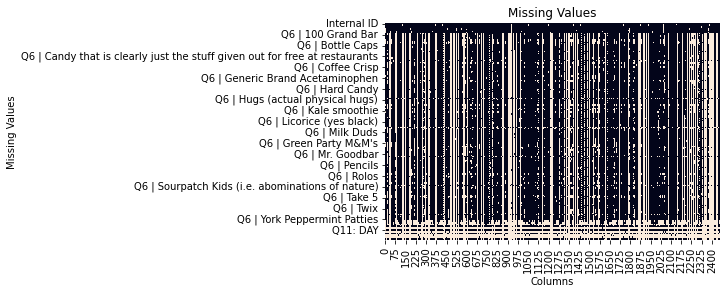

In [8]:
ax = plt.axes()
sns.heatmap(df.isna().transpose(), cbar=False, ax=ax)
plt.title('Missing Values', fontsize=12)
plt.xlabel('Columns', fontsize = 10) 
plt.ylabel('Missing Values', fontsize = 10)

In [9]:
# calculating duplicated values 
df.duplicated().sum()

0

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2460 entries, 0 to 2459
Columns: 120 entries, Internal ID to Click Coordinates (x, y)
dtypes: float64(4), int64(1), object(115)
memory usage: 2.3+ MB


In [11]:
df.describe()

,Internal ID,Q12: MEDIA [Daily Dish],Q12: MEDIA [Science],Q12: MEDIA [ESPN],Q12: MEDIA [Yahoo]
count,2.460000e+03,85.0,1362.0,99.0,67.0
mean,9.028016e+07,1.0,1.0,1.0,1.0
std,7.435532e+03,0.0,0.0,0.0,0.0
min,9.025877e+07,1.0,1.0,1.0,1.0
25%,9.027520e+07,1.0,1.0,1.0,1.0
50%,9.027780e+07,1.0,1.0,1.0,1.0
75%,9.028242e+07,1.0,1.0,1.0,1.0
max,9.031480e+07,1.0,1.0,1.0,1.0


# **3- write summary about what you get form the above functions**
> #### tips : this summary can be about : if there is any missing values , if there a wrong data type , if there a wrong range of values , ....

# As we can see from the above output:


1.   Our dataset consists of a total of 2460 rows and 120 columns.
2.   There are no duplicate rows.
3.   Some columns wont be useful in answering our questions using analysis.
4.   Too many columns with too many missing values to handle.






# **cleaning**

# **4- drop all the useless columns and  rows with too much NaN** 
> tip : useless columns can be like `Internal ID`and can be also columns with too much NaN 
- rename columns for easy access

In [12]:
#useless columns

In [13]:
df.drop(['Unnamed: 113'], axis=1, inplace=True)

In [14]:
df.drop(['Internal ID'], axis=1, inplace=True)

In [15]:
#drop columns with high % of NaN values.
#we will now delete any column that has more than 1844 missing values(70%)

In [16]:
nan_col=[feature for feature in df.columns if df[feature].isnull().sum()>1800]

In [17]:
nan_col

['Q9: OTHER COMMENTS',
 'Q12: MEDIA [Daily Dish]',
 'Q12: MEDIA [ESPN]',
 'Q12: MEDIA [Yahoo]']

In [18]:
df=df.drop(['Q8: DESPAIR OTHER','Q9: OTHER COMMENTS','Q12: MEDIA [Yahoo]', 'Q12: MEDIA [Daily Dish]','Q12: MEDIA [ESPN]'], axis=1)

In [19]:
df.isnull().sum()/df.shape[0]

Q1: GOING OUT?                      0.044715
Q2: GENDER                          0.016667
Q3: AGE                             0.034146
Q4: COUNTRY                         0.026016
Q5: STATE, PROVINCE, COUNTY, ETC    0.040650
                                      ...   
Q7: JOY OTHER                       0.629675
Q10: DRESS                          0.302439
Q11: DAY                            0.294715
Q12: MEDIA [Science]                0.446341
Click Coordinates (x, y)            0.347561
Length: 113, dtype: float64

In [20]:
for i in df.columns:
  if df[i].isnull().sum()/df.shape[0] >=.70:
    df.drop([i], axis=1, inplace=True)

# **5 - clean `going out` column**
> tip : you should choose which best value to put in place of these NaNs ( mode, unknown,other ....etc)

In [21]:
df = df.rename(columns = {'Q1: GOING OUT?' : 'going out'})

In [22]:
df['going out']

0       NaN
1        No
2       NaN
3        No
4        No
       ... 
2455     No
2456     No
2457     No
2458     No
2459     No
Name: going out, Length: 2460, dtype: object

In [23]:
df['going out'].unique()

array([nan, 'No', 'Yes'], dtype=object)

In [24]:
df['going out'].isnull().sum()/len(df['going out'])

0.044715447154471545

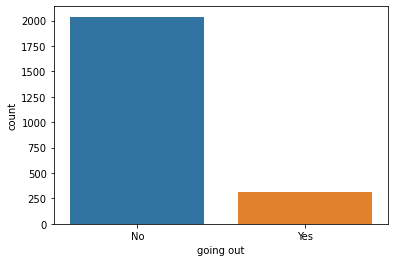

In [25]:
sns.countplot(x='going out',data=df)

In [26]:
df['going out'].fillna(value="UnKnown", inplace=True)

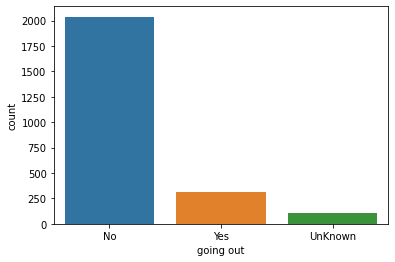

In [27]:
sns.countplot(x='going out',data=df,order=['No','Yes','UnKnown'])

# **6 - clean ` gender` column** 
> tip : you should choose which best value to put in place of these NaNs ( mode, unknown,other ....etc)

In [28]:
df = df.rename(columns = {'Q2: GENDER' : 'gender'})

In [29]:
df['gender'].isnull().sum()

41

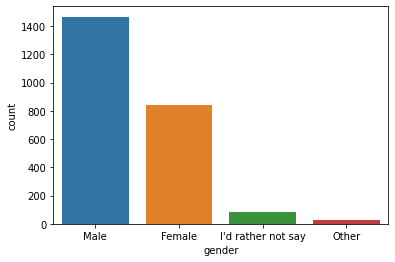

In [30]:
sns.countplot(x='gender',data=df)

In [31]:
df['gender'].fillna(value="I'd rather not say", inplace=True)

In [32]:
df['gender'].isnull().sum()

0

# **7 - clean ` age` column** 
> tip : note the type of age column , and NaN values
 - try to use `to_numeric` 
 - tip : you should choose which best value to put in place of these NaNs ( mean, median, ....etc)

In [33]:
df = df.rename(columns = {'Q3: AGE' : 'age'})

In [34]:
df['age'].isnull().sum()

84

In [35]:
out=df['age'].dtypes

In [36]:
print(out)

object


In [37]:
df['age'].value_counts()

40                 92
34                 90
37                 89
43                 86
42                 79
                   ..
older than dirt     1
5u                  1
Enough              1
See question 2      1
60+                 1
Name: age, Length: 106, dtype: int64

In [38]:
df['age'].unique()

array([nan, 44, 49, 40, 23, 53, 33, 43, 56, 64, 37, 59, 48, 54, 36, 45,
       25, 34, 35, 38, 58, 50, 47, 16, 52, 63, 65, 41, 27, 31, 61, 46, 42,
       62, 29, 39, 32, 28, 69, 67, 30, 22, 26, 51, 70, 24, 18, 19,
       'Old enough', 57, 60, 66, 12, 'Many', 55, 72, '?', 21, 11, 'no', 9,
       68, 20, 6, 10, 71, 90, 13, '45-55', 312, 99, 7, 'hahahahaha', 88,
       39.4, 74, 102, 'older than dirt', 17, 15, 8, 75, '5u', 'Enough',
       'See question 2', '24-50', 14, 'Over 50', 100, 76, 1000,
       'sixty-nine', '46 Halloweens.', 'ancient', 77, 'OLD', 'old', 73,
       70.5, 1, 'MY NAME JEFF', 4, '59 on the day after Halloween',
       'old enough', 'your mom',
       'I can remember when Java was a cool new language', '60+'],
      dtype=object)

In [39]:
df['age']= df['age'].map(str)

In [40]:
df['age'].unique()

array(['nan', '44', '49', '40', '23', '53', '33', '43', '56', '64', '37',
       '59', '48', '54', '36', '45', '25', '34', '35', '38', '58', '50',
       '47', '16', '52', '63', '65', '41', '27', '31', '61', '46', '42',
       '62', '29', '39', '32', '28', '69', '67', '30', '22', '26', '51',
       '70', '24', '18', '19', 'Old enough', '57', '60', '66', '12',
       'Many', '55', '72', '?', '21', '11', 'no', '9', '68', '20', '6',
       '10', '71', '90', '13', '45-55', '312', '99', '7', 'hahahahaha',
       '88', '39.4', '74', '102', 'older than dirt', '17', '15', '8',
       '75', '5u', 'Enough', 'See question 2', '24-50', '14', 'Over 50',
       '100', '76', '1000', 'sixty-nine', '46 Halloweens.', 'ancient',
       '77', 'OLD', 'old', '73', '70.5', '1', 'MY NAME JEFF', '4',
       '59 on the day after Halloween', 'old enough', 'your mom',
       'I can remember when Java was a cool new language', '60+'],
      dtype=object)

In [41]:
filter1 = df["age"].isin(['24-50','45-55','60+','u','no'])

In [42]:
filter1.value_counts()

False    2456
True        4
Name: age, dtype: int64

In [43]:
df['age'] = df['age'].str.replace("+","")
df['age'] = df['age'].str.replace("u","uu")
df['age'] = df['age'].str.replace("o","oo")
df['age'] = df['age'].str.replace("24-50","37")
df['age'] = df['age'].str.replace("45-55","50")

<ipython-input-43-e9fe8f8672cd>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['age'] = df['age'].str.replace("+","")



*  Replace the + with an empty value
*   We substituted the age range for the mean



In [44]:
df['age'].unique()

array(['nan', '44', '49', '40', '23', '53', '33', '43', '56', '64', '37',
       '59', '48', '54', '36', '45', '25', '34', '35', '38', '58', '50',
       '47', '16', '52', '63', '65', '41', '27', '31', '61', '46', '42',
       '62', '29', '39', '32', '28', '69', '67', '30', '22', '26', '51',
       '70', '24', '18', '19', 'Old enoouugh', '57', '60', '66', '12',
       'Many', '55', '72', '?', '21', '11', 'noo', '9', '68', '20', '6',
       '10', '71', '90', '13', '312', '99', '7', 'hahahahaha', '88',
       '39.4', '74', '102', 'oolder than dirt', '17', '15', '8', '75',
       '5uu', 'Enoouugh', 'See quuestioon 2', '14', 'Over 50', '100',
       '76', '1000', 'sixty-nine', '46 Hallooweens.', 'ancient', '77',
       'OLD', 'oold', '73', '70.5', '1', 'MY NAME JEFF', '4',
       '59 oon the day after Hallooween', 'oold enoouugh', 'yoouur moom',
       'I can remember when Java was a cooool new languuage'],
      dtype=object)

In [45]:
filter2 = df["age"].isin(['Old enough','Many',  '?','no', 'hahahahaha','older than dirt', 'Enough','5u', 'See question 2','Over 50',
                            'sixty-nine','46 Halloweens.','ancient','OLD','old','MY NAME JEFF',
                            '59 on the day after Halloween','old enough','your mom', 'I can remember when Java was a cool new language'])

In [46]:
filter2.value_counts()

False    2452
True        8
Name: age, dtype: int64

In [47]:
digit=df['age'].str.len()

In [48]:
df.loc[digit!=2,'age']=np.nan

In [49]:
df['age'].unique()

array([nan, '44', '49', '40', '23', '53', '33', '43', '56', '64', '37',
       '59', '48', '54', '36', '45', '25', '34', '35', '38', '58', '50',
       '47', '16', '52', '63', '65', '41', '27', '31', '61', '46', '42',
       '62', '29', '39', '32', '28', '69', '67', '30', '22', '26', '51',
       '70', '24', '18', '19', '57', '60', '66', '12', '55', '72', '21',
       '11', '68', '20', '10', '71', '90', '13', '99', '88', '74', '17',
       '15', '75', '14', '76', '77', '73'], dtype=object)

In [50]:
pd.to_numeric(df['age'])

0        NaN
1       44.0
2       49.0
3       40.0
4       23.0
        ... 
2455    24.0
2456    33.0
2457    26.0
2458    58.0
2459    66.0
Name: age, Length: 2460, dtype: float64

In [51]:
df['age'] = df['age'].astype('float64')

In [52]:
df['age'].unique()

array([nan, 44., 49., 40., 23., 53., 33., 43., 56., 64., 37., 59., 48.,
       54., 36., 45., 25., 34., 35., 38., 58., 50., 47., 16., 52., 63.,
       65., 41., 27., 31., 61., 46., 42., 62., 29., 39., 32., 28., 69.,
       67., 30., 22., 26., 51., 70., 24., 18., 19., 57., 60., 66., 12.,
       55., 72., 21., 11., 68., 20., 10., 71., 90., 13., 99., 88., 74.,
       17., 15., 75., 14., 76., 77., 73.])

In [53]:
df['age'].isnull().sum()

124

In [54]:
df['age'].describe()

count    2336.000000
mean       42.198630
std        11.733731
min        10.000000
25%        34.000000
50%        42.000000
75%        50.000000
max        99.000000
Name: age, dtype: float64

In [55]:
df['age'].median()

42.0

In [56]:
df['age'].mode()

0    40.0
dtype: float64

In [57]:
df['age'].mean()

42.1986301369863

There is no significant difference between the median and median value, this indicates that there are no external values so we can replace the nan values with any of them, but here we will choose the mean

In [58]:
df['age'].fillna(df['age'].mean(), inplace = True)

In [59]:
df['age']

0       42.19863
1       44.00000
2       49.00000
3       40.00000
4       23.00000
          ...   
2455    24.00000
2456    33.00000
2457    26.00000
2458    58.00000
2459    66.00000
Name: age, Length: 2460, dtype: float64

In [60]:
df['age'] = df['age'].astype('int')

In [61]:
df['age']

0       42
1       44
2       49
3       40
4       23
        ..
2455    24
2456    33
2457    26
2458    58
2459    66
Name: age, Length: 2460, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70]), <a list of 71 Text major ticklabel objects>)

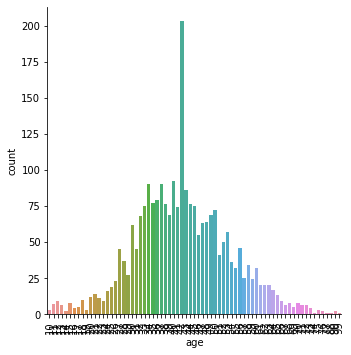

In [62]:
sns.catplot(x="age",data=df,kind='count')
plt.xticks(rotation=90)

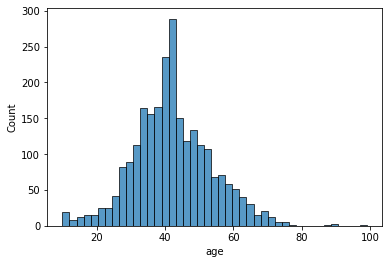

In [63]:
bins = "auto"
sns.histplot(data=df, x="age", bins=bins)

# **8 - clean ` country` column**
> tip : note that country column has country names with different writing ways 
  - use fuzzywuzzy to deal with this problem
  - you should choose which best value to put in place of these NaNs ( mode, unknown,other ....etc)

In [64]:
pip install fuzzywuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [65]:
from fuzzywuzzy import process

/usr/local/lib/python3.8/dist-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [66]:
df_copy=df.copy()

In [67]:
df_copy = df_copy.rename(columns = {'Q4: COUNTRY' : 'country'})

In [68]:
df_copy['country']=df_copy['country'].str.lower()
df_copy['country']=df_copy['country'].str.strip()

In [69]:
df_copy['country'].unique()

array([nan, 'usa', 'us', 'canada', 'murica', 'united states', 'uk',
       'united kingdom', 'united staes', 'united states of america',
       'uae', 'england', 'mexico', 'u.s.a.', 'usausausa', 'america',
       'france', 'finland', 'unhinged states', 'us of a', 'unites states',
       'the united states', 'north carolina', 'unied states',
       'netherlands', 'germany', 'europe', 'earth', 'u s', 'u.s.', 'u.k.',
       'costa rica', 'the united states of america', 'unite states',
       'cascadia', 'australia', 'insanity lately', 'greece',
       'usa? hard to tell anymore..', "'merica", 'usas', 'pittsburgh',
       'united state', 'a', 'can', 'canae', 'new york', 'trumpistan',
       'ireland', 'united sates', 'korea', 'california', 'japan',
       'south africa',
       'i pretend to be from canada, but i am really from the united states.',
       'iceland', 'canada`', 'scotland', 'denmark', 'united stated',
       'switzerland', 'ahem....amerca', 'ud', 'south korea', 'new jersey',

In [70]:
all_countries_world=['Afghanistan'
,'Albania'
,'Algeria'
,'Andorra'
,'Angola'
,'Antigua and Barbuda'
,'Argentina'
,'Armenia'
,'Australia'
,'Austria'
,'Azerbaijan'
,'america'
,'The Bahamas'
,'Bahrain'
,'Bangladesh'
,'Barbados'
,'Belarus'
,'Belgium'
,'Belize'
,'Benin'
,'Bhutan'
,'Bolivia'
,'Bosnia and Herzegovina'
,'Botswana'
,'Brazil'
,'Brunei'
,'Bulgaria'
,'Burkina Faso'
,'Burundi'

,'Cabo Verde'
,'Cambodia'
,'Cameroon'
,'Canada'
,'Central African Republic'
,'Chad'
,'Chile'
,'China'
,'Colombia'
,'Comoros'
,'Congo, Democratic Republic of the'
,'Congo, Republic of the'
,'Costa Rica'
,'Côte d’Ivoire'
,'Croatia'
,'Cuba'
,'Cyprus'
,'Czech Republic'

,'Denmark'
,'Djibouti'
,'Dominica'
,'Dominican Republic'

,'East Timor (Timor-Leste)'
,'Ecuador'
,'Egypt'
,'El Salvador'
,'Equatorial Guinea'
,'Eritrea'
,'Estonia'
,'Eswatini'
,'Ethiopia'

,'Fiji'
,'Finland'
,'France'

,'Gabon'
,'The Gambia'
,'Georgia'
,'Germany'
,'Ghana'
,'Greece'
,'Grenada'
,'Guatemala'
,'Guinea'
,'Guinea-Bissau'
,'Guyana'

,'Haiti'
,'Honduras'
,'Hungary'

,'Iceland'
,'India'
,'Indonesia'
,'Iran'
,'Iraq'
,'Ireland'

,'Italy'

,'Jamaica'
,'Japan'
,'Jordan'

,'Kazakhstan'
,'Kenya'
,'Kiribati'
,'Korea North'
,'Korea South'
,'Kosovo'
,'Kuwait'
,'Kyrgyzstan'

,'Laos'
,'Latvia'
,'Lebanon'
,'Lesotho'
,'Liberia'
,'Libya'
,'Liechtenstein'
,'Lithuania'
,'Luxembourg'

,'Madagascar'
,'Malawi'
,'Malaysia'
,'Maldives'
,'Mali'
,'Malta'
,'Marshall Islands'
,'Mauritania'
,'Mauritius'
,'Mexico'
,'Micronesia, Federated States of'
,'Moldova'
,'Monaco'
,'Mongolia'
,'Montenegro'
,'Morocco'
,'Mozambique'
,'Myanmar (Burma)'

,'Namibia'
,'Nauru'
,'Nepal'
,'Netherlands'
,'New Zealand'
,'Nicaragua'
,'Niger'
,'Nigeria'
,'North Macedonia'
,'Norway'

,'Oman'

,'Pakistan'
,'Palau'
,'Panama'
,'Papua New Guinea'
,'Paraguay'
,'Peru'
,'Philippines'
,'Poland'
,'Portugal'

,'Qatar'

,'Romania'
,'Russia'
,'Rwanda'

,'Saint Kitts and Nevis'
,'Saint Lucia'
,'Saint Vincent and the Grenadines'
,'Samoa'
,'San Marino'
,'Sao Tome and Principe'
,'Saudi Arabia'
,'Senegal'
,'Serbia'
,'Seychelles'
,'Sierra Leone'
,'Singapore'
,'Slovakia'
,'Slovenia'
,'Solomon Islands'
,'Somalia'
,'South Africa'
,'Spain'
,'Sri Lanka'
,'Sudan'
,'Sudan, South'
,'Suriname'
,'Sweden'
,'Switzerland'
,'Syria'

,'Taiwan'
,'Tajikistan'
,'Tanzania'
,'Thailand'
,'Togo'
,'Tonga'
,'Trinidad and Tobago'
,'Tunisia'
,'Turkey'
,'Turkmenistan'
,'Tuvalu'

,'Uganda'
,'Ukraine'
,'United Arab Emirates'
,'United Kingdom'
,'United States'
,'Uruguay'
,'Uzbekistan'

,'Vanuatu'
,'Vatican City'
,'Venezuela'
,'Vietnam'

,'Yemen'

,'Zambia'
,'Zimbabwe']

In [71]:
# Iterate through all_countries_world
for cuisine in all_countries_world:  
  # Create a list of matches, comparing cuisine with the cuisine_type column
  matches = process.extract(cuisine, df_copy['country'], limit=len(df_copy.country))


  # Iterate through the list of matches
  for match in matches:
     # Check whether the similarity score is greater than or equal to 80
    if match[1] >= 80:
      # If it is, select all rows where the cuisine_type is spelled this way, and set them to the correct cuisine
      df_copy.loc[df_copy['country'] == match[0]] = cuisine
      


In [72]:
df_copy['country'].unique()

array([nan, 'usa', 'Austria', 'Canada', 'murica', 'United States',
       'Ukraine', 'United Kingdom', 'america', 'uae', 'england', 'Mexico',
       'u.s.a.', 'usausausa', 'France', 'Finland', 'Czech Republic',
       'north carolina', 'Netherlands', 'Germany', 'europe', 'earth',
       'u.k.', 'Costa Rica', 'cascadia', 'insanity lately', 'Greece',
       'usa? hard to tell anymore..', 'usas', 'pittsburgh', 'Albania',
       'canae', 'Papua New Guinea', 'trumpistan', 'Ireland',
       'Korea South', 'california', 'Japan', 'South Africa', 'scotland',
       'Denmark', 'Switzerland', 'Saudi Arabia', 'Indonesia', 'endland',
       'atlantis', 'murrika', 'usa! usa! usa!', 'usaa', 'alaska',
       'soviet canuckistan', 'Singapore', 'Russia', 'China', 'Taiwan',
       'hong kong', 'Spain', 'Sweden', 'narnia', 'u s a',
       'subscribe to dm4uz3 on youtube', 'usa usa usa!!!!',
       "i don't know anymore", 'Sao Tome and Principe'], dtype=object)

In [73]:
set([x for x in df_copy.country if 'u' in str(x)])  # unique values with 'u'

{'Austria',
 'Czech Republic',
 'Korea South',
 'Papua New Guinea',
 'Russia',
 'Saudi Arabia',
 'South Africa',
 'europe',
 'murica',
 'murrika',
 'pittsburgh',
 'soviet canuckistan',
 'subscribe to dm4uz3 on youtube',
 'trumpistan',
 'u s a',
 'u.k.',
 'u.s.a.',
 'uae',
 'usa',
 'usa usa usa!!!!',
 'usa! usa! usa!',
 'usa? hard to tell anymore..',
 'usaa',
 'usas',
 'usausausa'}

In [74]:
correct_values=['America','usa']

In [75]:
df_copy['country'] = df_copy['country'].str.replace("murrika","usa")
df_copy['country'] = df_copy['country'].str.replace("murica","usa")

In [76]:
matches = process.extract("usa", df_copy['country'], limit=len(df_copy.country))


  # Iterate through the list of matches
for match in matches:
     # Check whether the similarity score is greater than or equal to 80
    if match[1] >=75:
      # If it is, select all rows where the cuisine_type is spelled this way, and set them to the correct cuisine
      df_copy.loc[df_copy['country'] == match[0]] = "usa"
      

In [77]:
set([x for x in df_copy.country if 'u' in str(x)])  # unique values with 'u'

{'Austria',
 'Czech Republic',
 'Korea South',
 'Papua New Guinea',
 'Russia',
 'Saudi Arabia',
 'South Africa',
 'europe',
 'pittsburgh',
 'soviet canuckistan',
 'subscribe to dm4uz3 on youtube',
 'trumpistan',
 'u.k.',
 'uae',
 'usa',
 'usa? hard to tell anymore..'}

In [78]:
df_copy['country'] = df_copy['country'].str.replace("uae","usa")
df_copy['country'] = df_copy['country'].str.replace("musa","usa")


In [79]:
df_copy.drop(df_copy[df_copy['country'] =='subscribe to dm4uz3 on youtube'].index, inplace=True)

In [80]:
df_copy['country'] = df_copy['country'].str.replace('usa? hard to tell anymore..',"usa")

<ipython-input-80-3ad7b29fe572>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df_copy['country'] = df_copy['country'].str.replace('usa? hard to tell anymore..',"usa")


In [81]:
df_copy['country'][df_copy['country'] =="usa? hard to tell anymore.."] = "usa"    

In [82]:
set([x for x in df_copy.country if 'u' in str(x)])  # unique values with 'u'

{'Austria',
 'Czech Republic',
 'Korea South',
 'Papua New Guinea',
 'Russia',
 'Saudi Arabia',
 'South Africa',
 'europe',
 'pittsburgh',
 'soviet canuckistan',
 'trumpistan',
 'u.k.',
 'usa'}

In [83]:
df_copy['country'].unique()

array([nan, 'usa', 'Austria', 'Canada', 'United States', 'Ukraine',
       'United Kingdom', 'america', 'england', 'Mexico', 'France',
       'Finland', 'Czech Republic', 'north carolina', 'Netherlands',
       'Germany', 'europe', 'earth', 'u.k.', 'Costa Rica', 'cascadia',
       'insanity lately', 'Greece', 'pittsburgh', 'Albania', 'canae',
       'Papua New Guinea', 'trumpistan', 'Ireland', 'Korea South',
       'california', 'Japan', 'South Africa', 'scotland', 'Denmark',
       'Switzerland', 'Saudi Arabia', 'Indonesia', 'endland', 'atlantis',
       'alaska', 'soviet canuckistan', 'Singapore', 'Russia', 'China',
       'Taiwan', 'hong kong', 'Spain', 'Sweden', 'narnia',
       "i don't know anymore", 'Sao Tome and Principe'], dtype=object)

In [84]:
df_copy['country'] = df_copy['country'].str.replace("usa","United States")
df_copy['country'] = df_copy['country'].str.replace("america","United States")
df_copy.drop(df_copy[df_copy['country'] =="i don't know anymore"].index, inplace=True)

In [85]:
df_copy['country'].unique()

array([nan, 'United States', 'Austria', 'Canada', 'Ukraine',
       'United Kingdom', 'england', 'Mexico', 'France', 'Finland',
       'Czech Republic', 'north carolina', 'Netherlands', 'Germany',
       'europe', 'earth', 'u.k.', 'Costa Rica', 'cascadia',
       'insanity lately', 'Greece', 'pittsburgh', 'Albania', 'canae',
       'Papua New Guinea', 'trumpistan', 'Ireland', 'Korea South',
       'california', 'Japan', 'South Africa', 'scotland', 'Denmark',
       'Switzerland', 'Saudi Arabia', 'Indonesia', 'endland', 'atlantis',
       'alaska', 'soviet canuckistan', 'Singapore', 'Russia', 'China',
       'Taiwan', 'hong kong', 'Spain', 'Sweden', 'narnia',
       'Sao Tome and Principe'], dtype=object)

In [86]:
df_copy['country'].isnull().sum()

69

In [87]:
df_copy['country'].fillna(df_copy['country'].mode(), inplace=True)

# **9 - clean ` area` column**
> tip : area column has the same problem as country columns , but looking at all it's unique values may give us another way to deal with it rather than try to fix it

In [88]:
df.sample()

,going out,gender,age,Q4: COUNTRY,"Q5: STATE, PROVINCE, COUNTY, ETC",Q6 | 100 Grand Bar,Q6 | Anonymous brown globs that come in black and orange wrappers\t(a.k.a. Mary Janes),Q6 | Any full-sized candy bar,Q6 | Black Jacks,Q6 | Bonkers (the candy),Q6 | Bonkers (the board game),Q6 | Bottle Caps,Q6 | Box'o'Raisins,Q6 | Broken glow stick,Q6 | Butterfinger,Q6 | Cadbury Creme Eggs,Q6 | Candy Corn,Q6 | Candy that is clearly just the stuff given out for free at restaurants,Q6 | Caramellos,"Q6 | Cash, or other forms of legal tender",Q6 | Chardonnay,Q6 | Chick-o-Sticks (we don’t know what that is),Q6 | Chiclets,Q6 | Coffee Crisp,Q6 | Creepy Religious comics/Chick Tracts,Q6 | Dental paraphenalia,Q6 | Dots,Q6 | Dove Bars,Q6 | Fuzzy Peaches,Q6 | Generic Brand Acetaminophen,Q6 | Glow sticks,Q6 | Goo Goo Clusters,Q6 | Good N' Plenty,Q6 | Gum from baseball cards,Q6 | Gummy Bears straight up,Q6 | Hard Candy,Q6 | Healthy Fruit,Q6 | Heath Bar,Q6 | Hershey's Dark Chocolate,Q6 | Hershey’s Milk Chocolate,Q6 | Hershey's Kisses,Q6 | Hugs (actual physical hugs),Q6 | Jolly Rancher (bad flavor),Q6 | Jolly Ranchers (good flavor),Q6 | JoyJoy (Mit Iodine!),Q6 | Junior Mints,Q6 | Senior Mints,Q6 | Kale smoothie,Q6 | Kinder Happy Hippo,Q6 | Kit Kat,Q6 | LaffyTaffy,Q6 | LemonHeads,Q6 | Licorice (not black),Q6 | Licorice (yes black),Q6 | Lindt Truffle,Q6 | Lollipops,Q6 | Mars,Q6 | Maynards,Q6 | Mike and Ike,Q6 | Milk Duds,Q6 | Milky Way,Q6 | Regular M&Ms,Q6 | Peanut M&M’s,Q6 | Blue M&M's,Q6 | Red M&M's,Q6 | Green Party M&M's,Q6 | Independent M&M's,Q6 | Abstained from M&M'ing.,Q6 | Minibags of chips,Q6 | Mint Kisses,Q6 | Mint Juleps,Q6 | Mr. Goodbar,Q6 | Necco Wafers,Q6 | Nerds,Q6 | Nestle Crunch,Q6 | Now'n'Laters,Q6 | Peeps,Q6 | Pencils,Q6 | Pixy Stix,Q6 | Real Housewives of Orange County Season 9 Blue-Ray,Q6 | Reese’s Peanut Butter Cups,Q6 | Reese's Pieces,Q6 | Reggie Jackson Bar,Q6 | Rolos,Q6 | Sandwich-sized bags filled with BooBerry Crunch,Q6 | Skittles,Q6 | Smarties (American),Q6 | Smarties (Commonwealth),Q6 | Snickers,Q6 | Sourpatch Kids (i.e. abominations of nature),Q6 | Spotted Dick,Q6 | Starburst,Q6 | Sweet Tarts,Q6 | Swedish Fish,Q6 | Sweetums (a friend to diabetes),Q6 | Take 5,Q6 | Tic Tacs,Q6 | Those odd marshmallow circus peanut things,Q6 | Three Musketeers,Q6 | Tolberone something or other,Q6 | Trail Mix,Q6 | Twix,"Q6 | Vials of pure high fructose corn syrup, for main-lining into your vein",Q6 | Vicodin,Q6 | Whatchamacallit Bars,Q6 | White Bread,Q6 | Whole Wheat anything,Q6 | York Peppermint Patties,Q7: JOY OTHER,Q10: DRESS,Q11: DAY,Q12: MEDIA [Science],"Click Coordinates (x, y)"
431,No,Male,35,usa,ca,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [89]:
df['Q5: STATE, PROVINCE, COUNTY, ETC']

0                  NaN
1                   NM
2             Virginia
3                   or
4             exton pa
             ...      
2455                MD
2456          New York
2457         Tennessee
2458    North Carolina
2459      Pennsylvania
Name: Q5: STATE, PROVINCE, COUNTY, ETC, Length: 2460, dtype: object

In [90]:
df['Q5: STATE, PROVINCE, COUNTY, ETC'].unique()

array([nan, 'NM', 'Virginia', 'or', 'exton pa', 'Colorado ', 'ontario',
       'Ontario', 'Wa', 'Quebec', 'NY', 'California', 'Texas', 'NEW YORK',
       'CO', 'IN', 'MN', 'aberdeenshire', 'Alberta', 'Wisconsin, 53705',
       'RI', 'NC', 'Scotland', 'minnesota', 'Michigan', 'Florida',
       'New Jersey', 'VA', 'Colorado', 'Los Angeles, California', 'CA',
       'New York ', 'Chicago, Illinois', 'Nj', 'Wisconsin', 'Minnesota ',
       'London', 'mn', 'TEXAS', 'Illinois', 'District of Columbia',
       'Washington', 'Massachusetts ', 'OR', 'Montana', 'New York',
       'massachusetts', 'Abu Dhabi', 'TX', 'Arizona', 'Dc', 'yukon',
       'Pennsylvania ', 'MD', 'Ohio', 'Alberta ', 'OXFORDSHIRE', 'DC',
       'Iowa', 'Mn', 'TN', 'BC', 'Maryland', 'MI', 'Wisconsin ', 'alaska',
       'Ny', 'Colorado, Jefferson county ', 'Louisiana', 'pa',
       'CO, Larimer County', 'Nebraska ', 'Oregon', 'UT', 'ny',
       'Pennsylvania', 'CDMX', 'north carolina', 'Tennessee ', 'Texas ',
       'Knox cou

In [91]:
df['Q5: STATE, PROVINCE, COUNTY, ETC'].isnull().sum()

100

In [92]:
df.drop(['Q5: STATE, PROVINCE, COUNTY, ETC'], axis=1, inplace=True)

# **11 - clean ` dress` column**
>tip : you should choose which best value to put in place of these NaNs ( mode, unknown,other ....etc)

In [93]:
df = df.rename(columns = {'Q10: DRESS' : 'dress'})

In [94]:
df['dress']

0                  NaN
1       White and gold
2                  NaN
3       White and gold
4       White and gold
             ...      
2455    White and gold
2456    Blue and black
2457    Blue and black
2458               NaN
2459    White and gold
Name: dress, Length: 2460, dtype: object

In [95]:
df['dress'].unique()

array([nan, 'White and gold', 'Blue and black'], dtype=object)

In [96]:
df['dress'].isnull().sum()/len(df['dress'])

0.3024390243902439

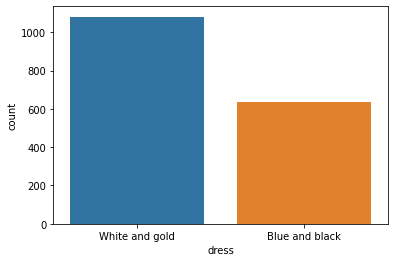

In [97]:
sns.countplot(x='dress',data=df)

In [98]:
df['dress'].fillna(value="UnKnown", inplace=True)

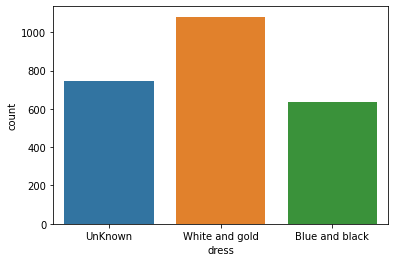

In [99]:
sns.countplot(x='dress',data=df)

# **12 - clean ` day` column**
>tip : you should choose which best value to put in place of these NaNs ( mode, unknown,other ....etc)

In [100]:
df = df.rename(columns = {'Q11: DAY' : 'day'})

In [101]:
df['day']

0          NaN
1       Sunday
2          NaN
3       Sunday
4       Friday
         ...  
2455    Friday
2456    Friday
2457    Friday
2458       NaN
2459    Sunday
Name: day, Length: 2460, dtype: object

In [102]:
df['day'].unique()

array([nan, 'Sunday', 'Friday'], dtype=object)

In [103]:
df['day'].isnull().sum()/len(df['day'])

0.29471544715447157

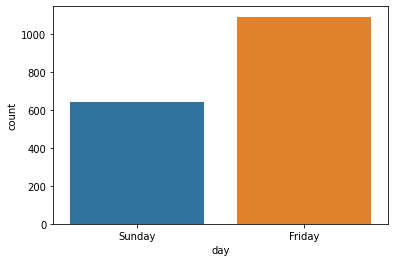

In [104]:
sns.countplot(x='day',data=df)

In [105]:
df['day'].fillna(value="UnKnown", inplace = True)

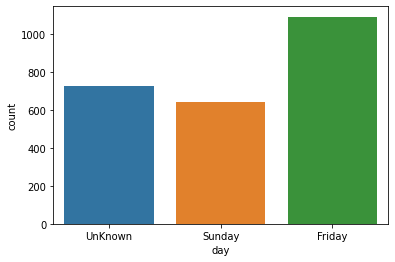

In [106]:
sns.countplot(x='day',data=df)

# **13 - check**
> after finish cleaning you should make sure your data is clean and that :
- there is no wrong data type
- there is no NaN values 
- all the column are cleaing and ready for the next step `EDA`

In [107]:
df.dtypes

going out                    object
gender                       object
age                           int64
Q4: COUNTRY                  object
Q6 | 100 Grand Bar           object
                             ...   
Q7: JOY OTHER                object
dress                        object
day                          object
Q12: MEDIA [Science]        float64
Click Coordinates (x, y)     object
Length: 112, dtype: object

In [108]:
df.drop(['Click Coordinates (x, y)'], axis=1, inplace=True)